In [52]:
#install libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

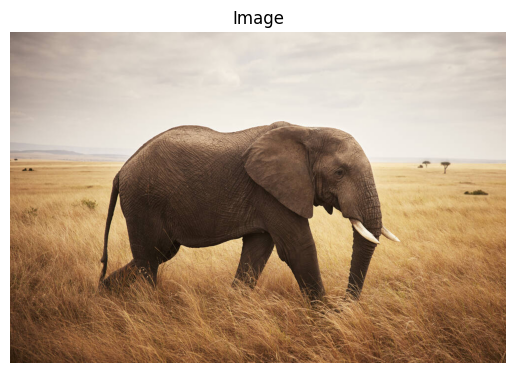

In [56]:
# read the image using OpenCV
img = cv2.imread(r"stylized_result.jpg")

# convert the color from BGR to RGB for displaying using matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image using matplotlib
plt.imshow(img)
plt.title('Image')
plt.axis('off')
plt.show()

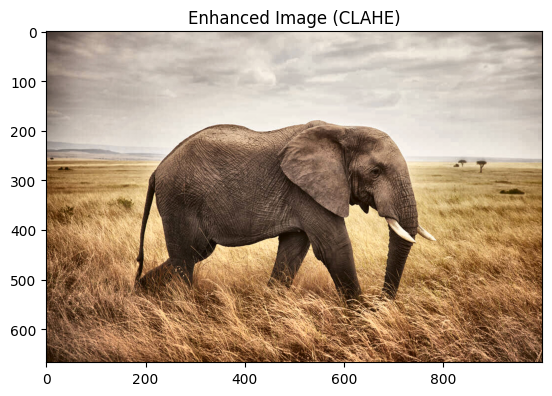

In [57]:
#Image Enhancement with CLAHE
def apply_clahe_bgr(img):
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    l2 = clahe.apply(l)
    lab2 = cv2.merge((l2, a, b))
    return cv2.cvtColor(lab2, cv2.COLOR_LAB2RGB)

enhanced = apply_clahe_bgr(img)
plt.imshow(enhanced)
plt.title("Enhanced Image (CLAHE)")
plt.show()

## Create Subject Mask


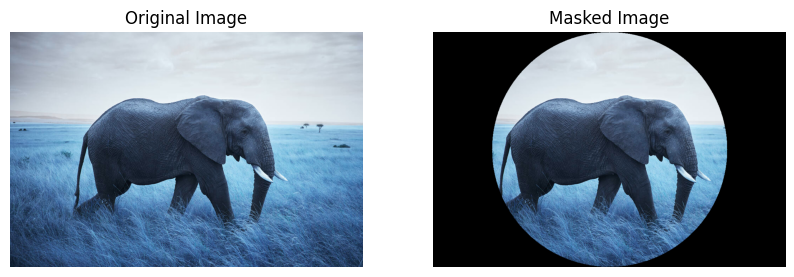

In [58]:
# Create a black mask with the same size as the image
mask = np.zeros_like(img)

# Define the center and radius of the circle
height, width = img.shape[:2]
center = (width // 2, height // 2)
radius = min(center[0], center[1])

# Draw a white circle in the mask
cv2.circle(mask, center, radius, (255, 255, 255), -1)

# Apply the mask to the image
masked_image = cv2.bitwise_and(img, mask)

# Display the original image with the circular mask
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
ax[1].set_title('Masked Image')
ax[0].axis('off')
ax[1].axis('off')
plt.show()

## Stylization

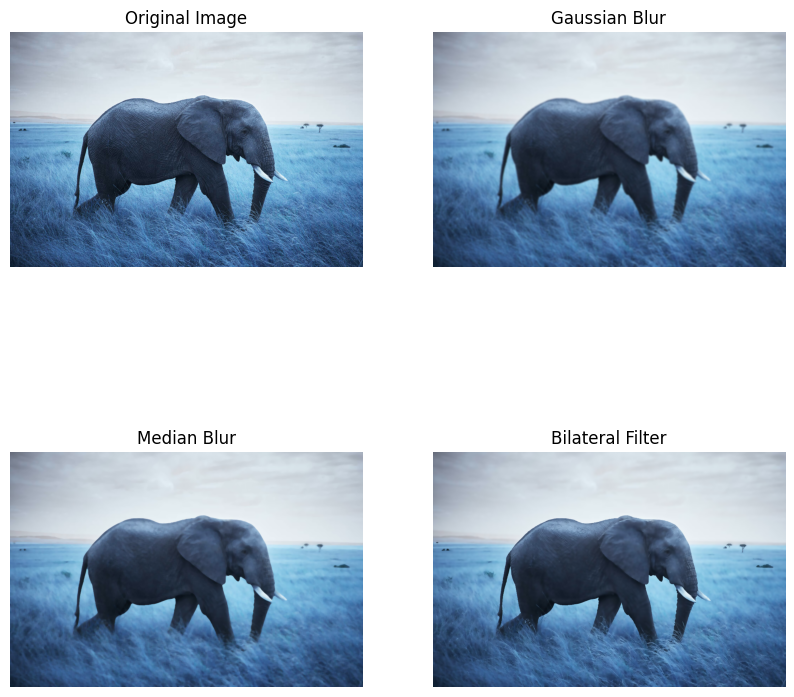

In [59]:


# Create a figure to display the images
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Display the original image
axs[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image')

# Apply a Gaussian blur to the image
gaussian_blur = cv2.GaussianBlur(img, (11, 11), 0)
axs[0, 1].imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Gaussian Blur')

# Apply a median blur to the image
median_blur = cv2.medianBlur(img, 7)
axs[1, 0].imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Median Blur')

# Apply a bilateral filter to the image
bilateral_filter = cv2.bilateralFilter(img, 9, 75, 75)
axs[1, 1].imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('Bilateral Filter')
axs[0, 0].axis('off')
axs[0, 1].axis('off')
axs[1, 0].axis('off')
axs[1, 1].axis('off')
plt.show()

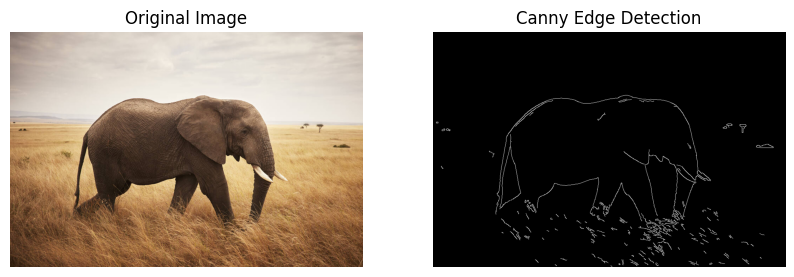

In [60]:
#canny edge detection

img = cv2.imread(r"stylized_result.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny Edge Detection
edges = cv2.Canny(blurred, 100, 200)

# Display the original image and the edges detected image side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(edges, cmap='gray')
axs[1].set_title('Canny Edge Detection')
axs[0].axis('off')
axs[1].axis('off')
plt.show()




### Bleded Image

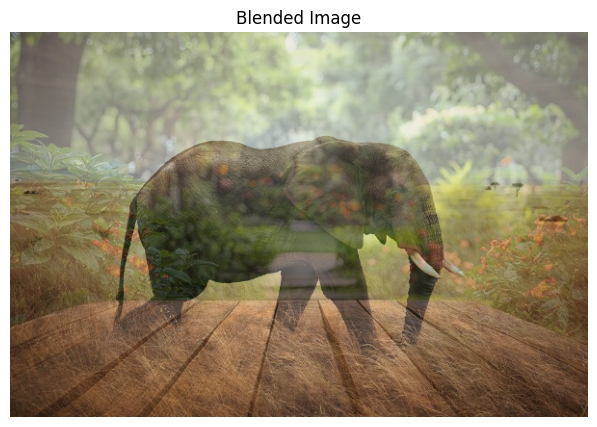

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
img = cv2.imread(r"stylized_result.jpg")
background = cv2.imread(r"bac.jpg")

# Resize bird to match background’s size
img = cv2.resize(img, (background.shape[1], background.shape[0]))

# Blend images
alpha = 0.6
beta = 0.4
blended = cv2.addWeighted(img, alpha, background, beta, 0)

# Convert to RGB for matplotlib
blended_rgb = cv2.cvtColor(blended, cv2.COLOR_BGR2RGB)

# Show result
plt.figure(figsize=(10,5))
plt.imshow(blended_rgb)
plt.title("Blended Image")
plt.axis("off")
plt.show()


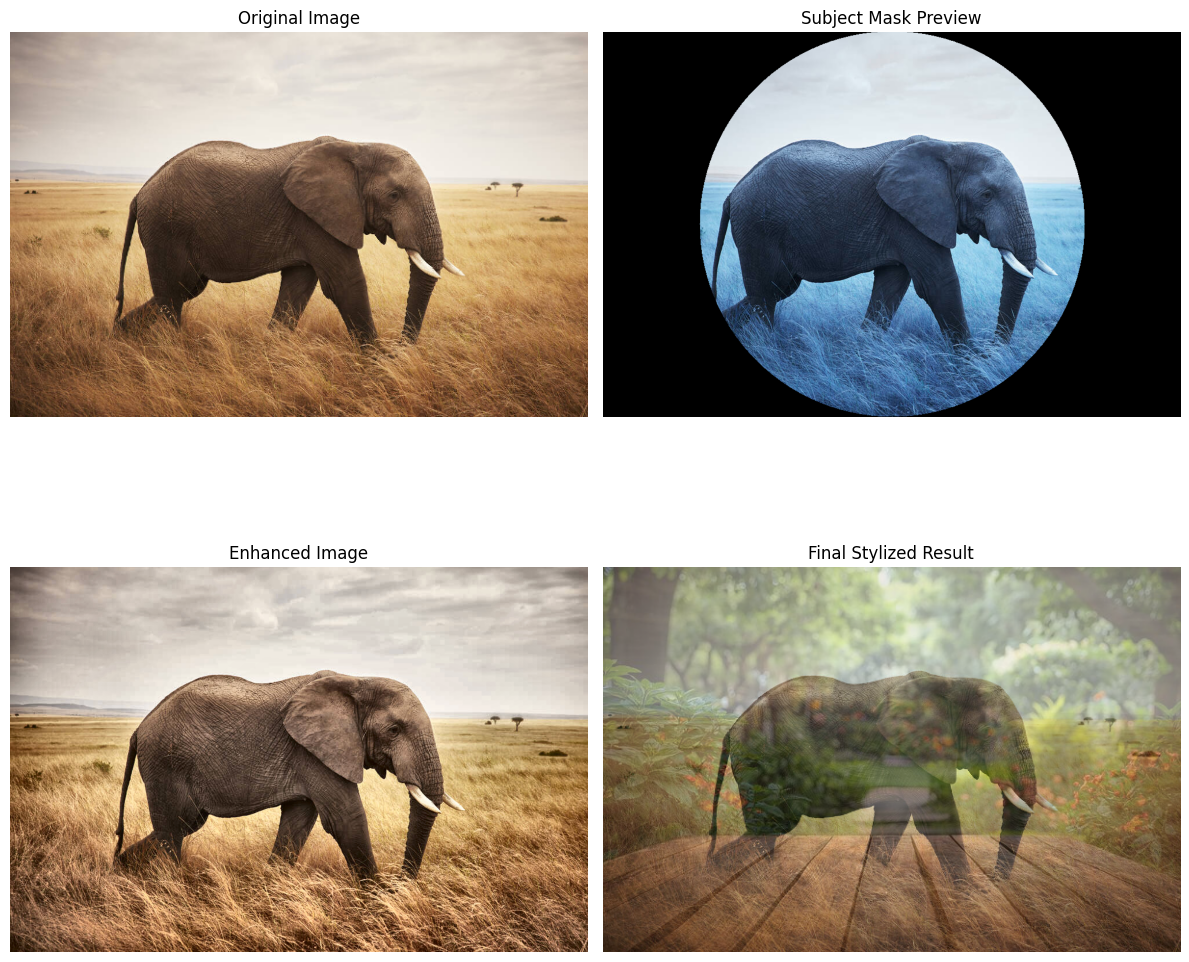

In [62]:
#Final Output

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Original Image
axs[0,0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0,0].set_title("Original Image")
axs[0,0].axis('off')

# Mask Preview
axs[0,1].imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
axs[0,1].set_title("Subject Mask Preview")
axs[0,1].axis('off')

# Enhanced Image (CLAHE)
axs[1,0].imshow(enhanced)  # already RGB
axs[1,0].set_title("Enhanced Image")
axs[1,0].axis('off')

# Final Blended/Stylized Result
axs[1,1].imshow(blended_rgb)
axs[1,1].set_title("Final Stylized Result")
axs[1,1].axis('off')

plt.tight_layout()
plt.show()
